In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
print(df.isnull().sum())
print(df.nunique())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64
satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64


### Impact of Salary on Retension

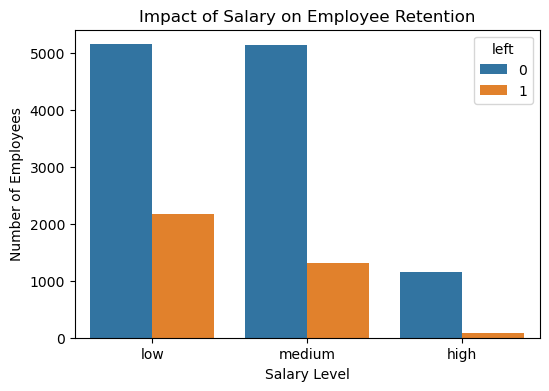

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="salary", hue="left")
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.show()

If low salary employees leave more → salary is strongly correlated with attrition.

### Impact of Department on Retension

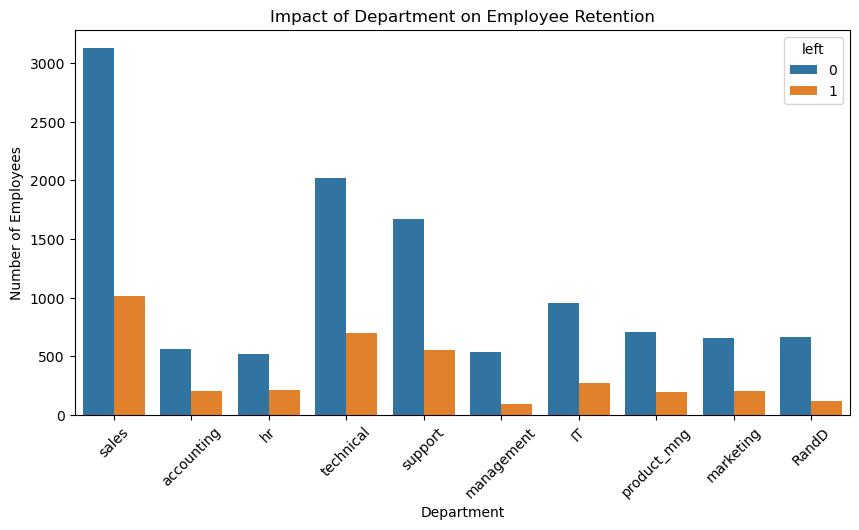

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Department", hue="left")
plt.title("Impact of Department on Employee Retention")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()

Some departments may have higher attrition than others.

### Correlation Heatmap (Numerical Features Only)

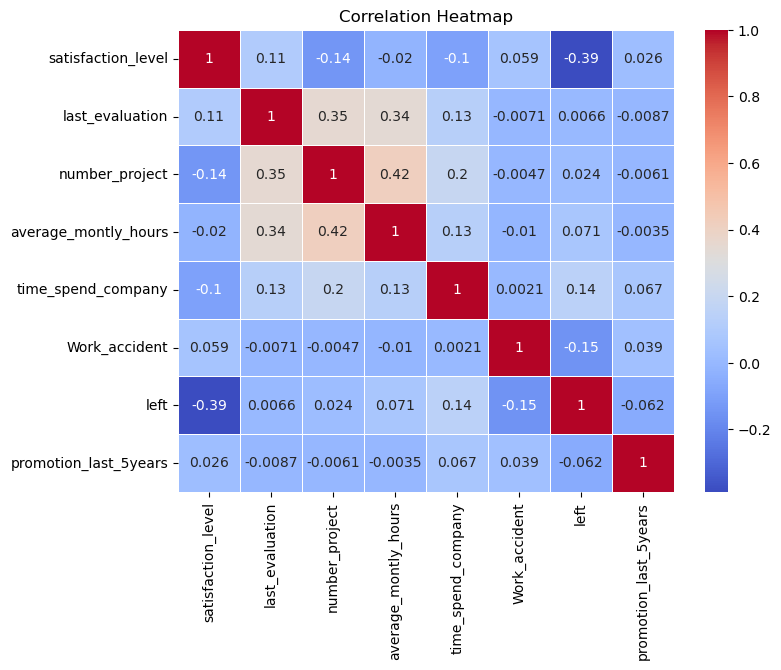

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

High attrition correlates with:
    Low satisfaction_level ❌
    High number_project ✅
    High average_montly_hours ✅
    Low salary ✅

In [13]:
# Data Preprocessing
df_encoded = pd.get_dummies(df, columns=['Department', 'salary'], drop_first=True)
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False


In [14]:
# Feature Selection
X = df_encoded.drop("left", axis=1)
y = df_encoded["left"]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building Logistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Model Evaluation

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7826666666666666

Confusion Matrix:
 [[2117  177]
 [ 475  231]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.33      0.41       706

    accuracy                           0.78      3000
   macro avg       0.69      0.63      0.64      3000
weighted avg       0.76      0.78      0.76      3000



### Feature Importance

C:\Users\91741\AppData\Local\Temp\ipykernel_7336\3606116028.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x="Coefficient", y="Feature", palette="viridis")


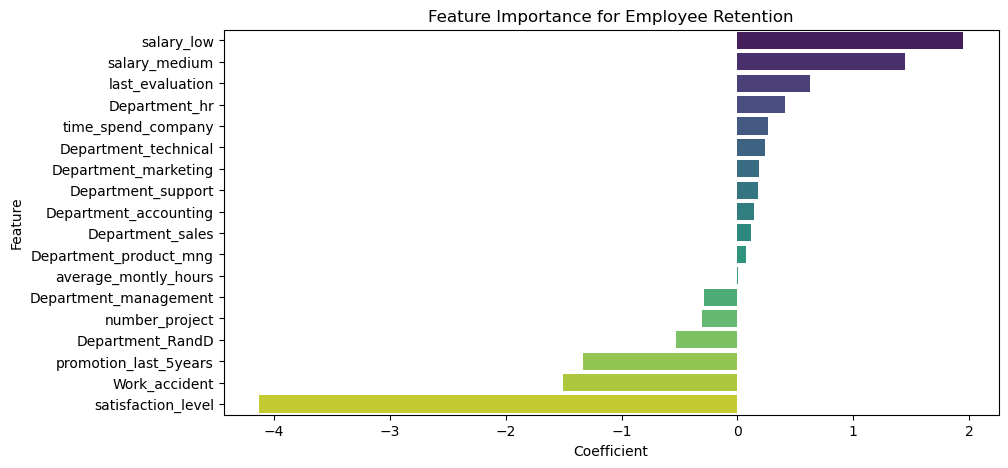

In [18]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(data=feature_importance, x="Coefficient", y="Feature", palette="viridis")
plt.title("Feature Importance for Employee Retention")
plt.show()

### Expected Results